## finding m and b from scratch using rigid regression

In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=32)

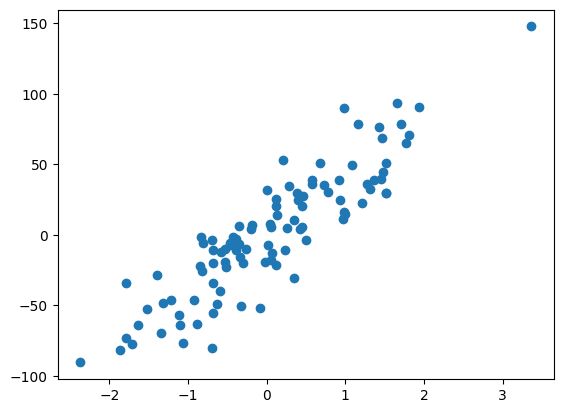

In [4]:
plt.scatter(X,y)

## from linear regression (OLS)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

In [27]:
lr.coef_

array([39.33307178])

In [28]:
lr.intercept_

-0.1777606861281336

In [15]:
#accuracy check from r2 score
from sklearn.metrics import r2_score


In [16]:
r2Score_lr = r2_score(y_test,y_pred)

In [17]:
print("Linear regression r2 score : ", r2Score_lr)

Linear regression r2 score :  0.8279781510639029


## Using gradient Descent

In [18]:
from sklearn.linear_model import SGDRegressor

In [22]:
sgd = SGDRegressor(max_iter=100, learning_rate='constant')

In [23]:
sgd.fit(X_train,y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [24]:
y_pred_sgd = sgd.predict(X_test)

In [30]:
sgd.coef_

array([39.05229121])

In [29]:
sgd.intercept_

array([0.16152313])

In [25]:
r2Score_sgd = r2_score(y_test,y_pred_sgd)

In [26]:
print("Stochastic GD r2 score : ", r2Score_sgd)

Stochastic GD r2 score :  0.8272183004350923


## Applying RigidREgression 

In [37]:
from sklearn.linear_model import Ridge

In [42]:
rgr = Ridge(alpha=10)

In [43]:
rgr.fit(X_train,y_train)

Ridge(alpha=10)

In [46]:
y_pred_rgr = rgr.predict(X_test)

In [48]:
r2Score_rgr = r2_score(y_test,y_pred_rgr)
print("Applying Rigid Regression r2 score : ", r2Score_rgr)

Applying Rigid Regression r2 score :  0.8213025135378872


In [44]:
rgr.coef_

array([35.07284219])

In [45]:
rgr.intercept_

-0.17857797557957292

In [51]:
rgr2 = Ridge(alpha=100)
rgr2.fit(X_train,y_train)
y_pred_rgr2 = rgr2.predict(X_test)

## visulization

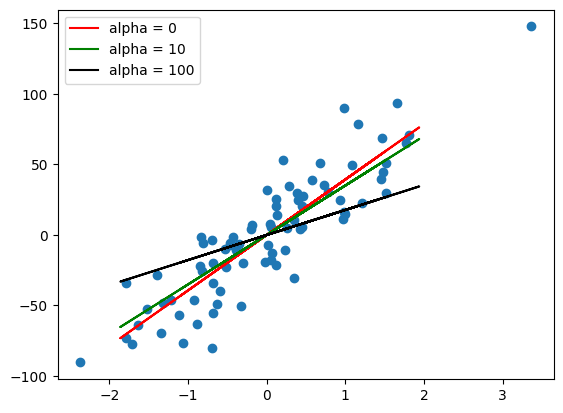

In [57]:
plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, color='red', label='alpha = 0')
plt.plot(X_test, y_pred_rgr, color='green', label='alpha = 10')
plt.plot(X_test, y_pred_rgr2, color='black', label='alpha = 100')
plt.legend()

# Rigid Regression (L2) from scratch

In [73]:
# for 2-Dim
class Rigid_Regression:
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X,y):   #X,y -> X_train, y_train
        num = 0  #numerator
        den = 0  #denominator

        for i in range(X.shape[0]):
            num += (y[i] - y.mean()) * (X[i] - X.mean()) 
            den += (X[i] - X.mean()) * (X[i] - X.mean()) 
        den += self.alpha
        self.m = num/den
        self.b = y.mean() - (self.m * X.mean())
        print(self.m, self.b)
        

    def predict(self,X): #X -> X_train
        return self.m*X + self.b

In [74]:
myreg = Rigid_Regression(alpha=10)

In [75]:
myreg.fit(X_train,y_train)

[35.07284219] [-0.17857798]


In [78]:
y_pred_myreg = myreg.predict(X_test)

In [79]:
r2_score_myreg = r2_score(y_test, y_pred_myreg)

In [80]:
print(r2_score_myreg)

0.8213025135378872
